In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PyComplexHeatmap as pch
import seaborn as sns
import random
random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/processed/xenium/WT_Mut_catalyst_proseg_prior_expan5um_raw_noBoundary_lowTranscriptLeidenClusterRemoved_Nov25_p46_neuronal_cells_removed.h5ad')
adata.obs['cell_type_final'] = adata.obs[[i for i in adata.obs.columns if 'usage' in i]].apply(lambda x: x.idxmax().split('_')[0] if x.max() > 0.1 else 'Underdetermined', axis=1)
wt_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.1/data/wt_adata_p52P_filtered.h5ad')


In [3]:

plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig5/Fig5.1/plots'
line_width = 1.5
# cell_type_colors = {
#         'AC-like': '#4daf4a',          # Green
#         'OPC-like': '#377eb8',         # Blue
#         'Myeloid': '#984ea3',         # Purple
#         'MES-like': '#e41a1c',          # Red
#         'Oligodendrocyte': '#ff7f00',  # Orange
#         'Pericyte': '#f781bf',         # Yellow
#         'Cycling': '#a65628',          # Brown
#         'Endothelial': '#00ff00',      # Pink
#         'Excitatory neuron': '#6C94FF',# Grey
#         'T cell': '#ffff33',           # Bright Green
#         'Inhibitory neuron': '#555555', # Dark Gray
#         'Other': "#808080"  # Gray for 'Other'
#     }

# cell_type_colors = {
#         'AC-like': "#A3C4DC", #(soft sky blue)
#         'OPC-like': "#8FA8C8", #(desaturated blue-gray)
#         'Myeloid': "#D3A5C8", #(muted mauve)
#         'MES-like': "#D9735A", #(burnt coral for stronger contrast)
#         'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
#         'Pericyte': "#E3C07E", #(soft mustard yellow)
#         'Cycling': "#A69AB2", # (muted lavender)
#         'Endothelial': "#A8D7A9", # (pale mint green)
#         'Excitatory neuron': "#D6D2C4", #(muted beige)
#         'T cell': "#89A970", #(soft olive green)
#         'Inhibitory neuron': "#656565", # (medium gray)
#         # 'Other': "#808080"  # Gray for 'Other'
#     }


cell_type_colors = {
        'AC-like': "#92B0C6", #(soft sky blue)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Pericyte': "#B0408A", #(soft mustard yellow)
        'Cycling': "#A69AB2", # (muted lavender)
        'Endothelial': "#DD51AD", # (pale mint green)
        'Excitatory neuron': "#D6D2C4", #(muted beige)
        'T cell': "#89A970", #(soft olive green)
        'Inhibitory neuron': "#656565", # (medium gray)
        # 'Other': "#808080"  # Gray for 'Other'
    }


In [4]:
from matplotlib.colors import ListedColormap

# Convert cell_type_colors to a colormap
cell_type_colormap = ListedColormap(list(cell_type_colors.values()), name='cell_type_colormap')

In [5]:
ordered_celltype = ['AC-like','OPC-like','MES-like','Cycling', 'Oligodendrocyte','Excitatory neuron', 'Inhibitory neuron','Pericyte','Endothelial','Myeloid','T cell']

In [6]:
### Figure 5A

def get_top_genes(top_n, df):
    topgenes = []
    for i in df.T.columns:
        tmp_df = df.T.nlargest(top_n, i).loc[:, i].to_frame().reset_index()
        tmp_df['cluster'] = i
        tmp_df.columns = [f'top_genes', 'spetra_score', 'cluster']
        topgenes.append(tmp_df)
    return pd.concat(topgenes)

spectra_score_p = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/results/xenium/cnmf/wt_mut_batch.gene_spectra_score.k_11.dt_0_01.txt'
cell_type = ['OPC-like','AC-like','MES-like', 'Myeloid','Pericyte', 'Oligodendrocyte','Excitatory neuron','Endothelial','Cycling','Inhibitory neuron','T cell']
gene_spetra = pd.read_csv(spectra_score_p, sep='\t',index_col=0)
top15_markers = get_top_genes(15, gene_spetra)[['top_genes','cluster']].\
    pivot(columns = 'cluster')
top15_markers.columns = cell_type
duplicated_markers = top15_markers.stack()[top15_markers.stack().duplicated()].tolist()
unique_top15_markers = np.unique(top15_markers.to_numpy().reshape(-1)).tolist()
unique_top15_markers = [x for x in unique_top15_markers if x not in duplicated_markers]


In [11]:
top15_markers['Myeloid'].tolist()

['RNASET2',
 'FCGR3A',
 'FCER1G',
 'HLA-DMB',
 'CD4',
 'MS4A6A',
 'GPR34',
 'ITGB2',
 'FCGR1A',
 'CTSS',
 'SPI1',
 'AIF1',
 'CD163',
 'ITGAX',
 'LY86']

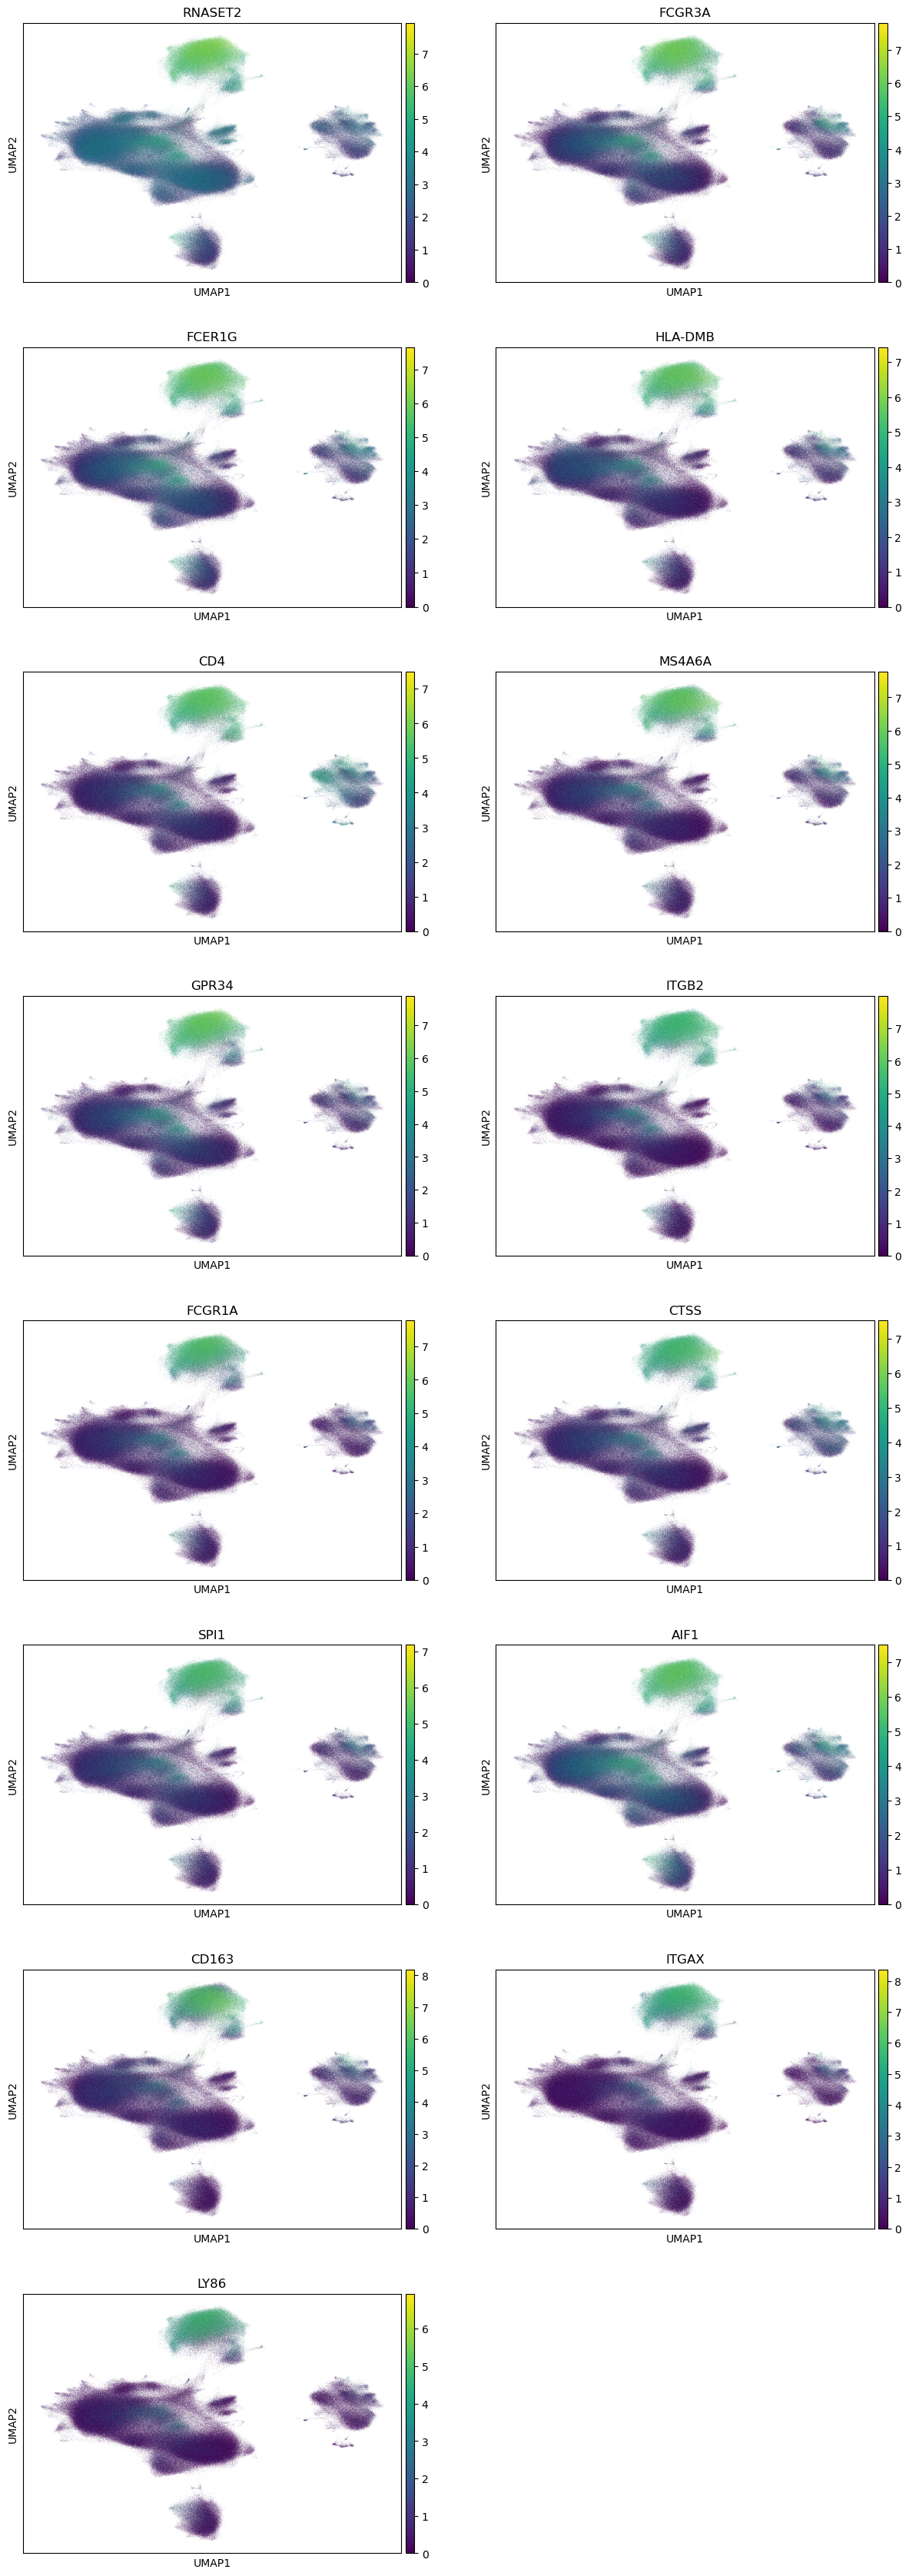

In [9]:
sc.pl.umap(adata, color =top15_markers['Myeloid'].tolist(), ncols=2)

In [7]:
top15_markers

,OPC-like,AC-like,MES-like,Myeloid,Pericyte,Oligodendrocyte,Excitatory neuron,Endothelial,Cycling,Inhibitory neuron,T cell
0,OLIG2,AQP4,CD44,RNASET2,DCN,CNTN2,SLC17A7,ESAM,TOP2A,GAD2,CD2
1,OLIG1,MLC1,ANXA1,FCGR3A,PDGFRB,ERMN,CRYM,PECAM1,CENPF,GAD1,CD3G
2,BCAN,GJA1,CAV1,FCER1G,COL3A1,CLDN11,C1QL3,FLT1,CCNB2,TAC1,CCL5
3,PDGFRA,SPON1,VIM,HLA-DMB,IGFBP4,MAG,CCKBR,FLT4,MKI67,BTBD11,TRAC
4,SOX4,PON2,HILPDA,CD4,COL1A1,CNDP1,SCN8A,KDR,CDK1,PVALB,THEMIS
5,PTPRZ1,TTYH1,PTPN12,MS4A6A,MYL9,MAL,FSTL4,ENG,GAS2L3,CRHBP,GZMA
6,VCAN,HEPACAM,LOX,GPR34,TPM2,MYRF,CAMK2A,MFSD2A,EZH2,SYNPR,CYTIP
7,PTCH1,TRIL,CAMK2D,ITGB2,COL4A1,MOG,HS3ST2,IGFBP3,PCNA,MEPE,CD48
8,SLC24A3,GPR37L1,IGFBP5,FCGR1A,FBLN1,UGT8,CCK,KLF2,SOX11,LHX6,CD52
9,NCAM1,FGFR3,STAT3,CTSS,BGN,MOBP,HTR2A,LXN,CCNE1,ANK1,NKG7


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 73.1675 mm


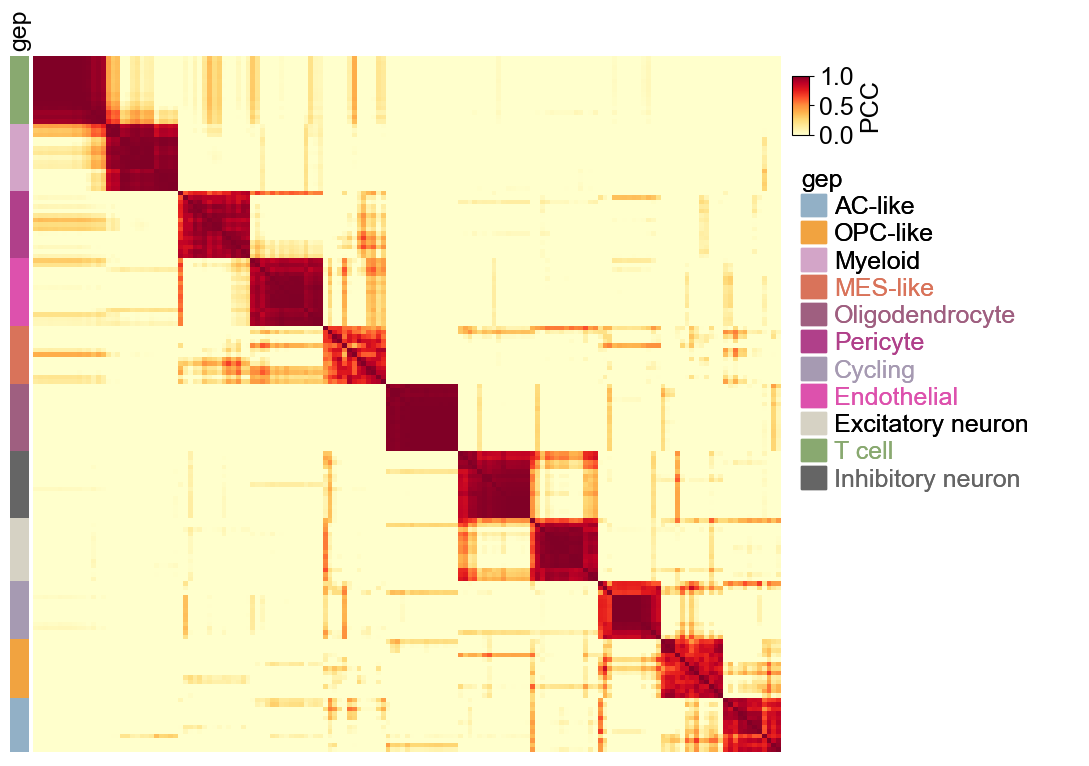

In [ ]:


## remove genes not clustered well
excluded_genes = ['TESPA1','APOE','SERPINA3','TGFB2', 'NCAM1','SOX9']
unique_top15_markers = [x for x in unique_top15_markers if x not in excluded_genes]

topmarkers_dict = top15_markers.to_dict(orient='list')
uniq_topmarkers_dict = {k:list(set(v)-set(duplicated_markers + excluded_genes)) for k,v in top15_markers.to_dict(orient='list').items()}

from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

gene_spetra_subset = gene_spetra[unique_top15_markers]
gene_program = top15_markers.melt()[['value', 'variable']].drop_duplicates('value').set_index('value').\
    rename(columns={'variable':'gene_program'}).iloc[:, 0].astype('category')
gene_program = gene_program[unique_top15_markers]
# gene_program = pd.Categorical(gene_program, categories=cell_type, ordered=True)
markers_cos_sim = pd.DataFrame(cosine_similarity(gene_spetra_subset.T), index=gene_spetra_subset.columns.tolist(),columns=gene_spetra_subset.columns.tolist())
cmap = plt.get_cmap('Set3')
colors_hex = [to_hex(cmap(i)) for i in range(cmap.N)]
# ordered_colors = {
#     'T cell': '#ccebc5',
#     'Myeloid': '#b3de69',
#     'Pericyte': '#bc80bd',
#     'Endothelial': '#bebada',
#     'MES-like': '#fdb462',
#     'Cycling': '#ffffb3',
#     'OPC-like': '#fccde5',
#     'AC-like': '#8dd3c7',
#     'Oligodendrocyte': '#d9d9d9',
#     'Inhibitory neuron': '#80b1d3',
#     'Excitatory neuron': '#fb8072'
#  }

plt.rcParams.update({'font.family': 'Arial', 'font.size': 18})
row_ha = pch.HeatmapAnnotation(gep =pch.anno_simple(gene_program[markers_cos_sim.index], 
                                                    legend=True,height=5, 
                                                    colors=cell_type_colors,
                                                    legend_kws={'frameon':False}),
                                                    axis=0)
plt.figure(figsize=(10, 8))
hp1 = pch.ClusterMapPlotter(markers_cos_sim,
                            row_cluster=True, 
                      cmap="YlOrRd", 
                      left_annotation=row_ha,
                      label = 'PCC',
                    #   show_rownames=True,
                      vmin=0)
plt.savefig(f'{plot_dir}/Figure5A.png', dpi=300, bbox_inches='tight')

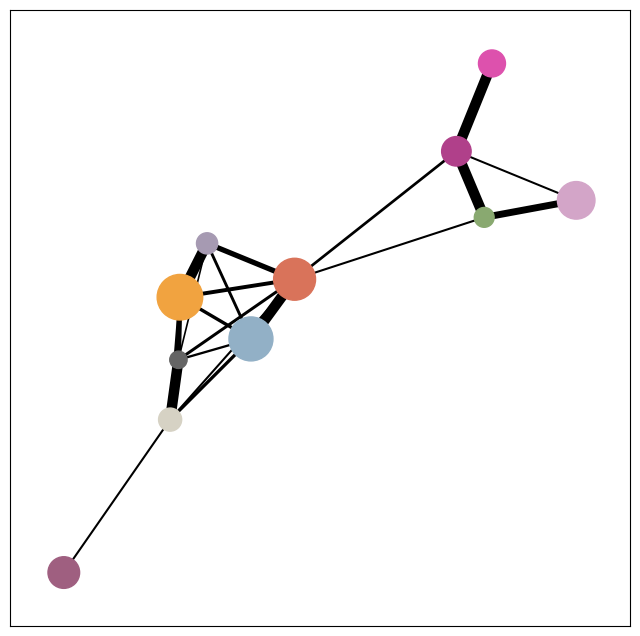

In [49]:
# sc.tl.paga(adata, groups='cell_type_final')
fig, ax = plt.subplots(figsize=(8, 8))
sc.pl.paga(adata, color = ['cell_type_final'], 
# cmap=cell_type_colormap,
node_size_scale=3,
# layout='kk',

labels=['']*len(adata.obs['cell_type_final'].unique()),
show=False,ax=ax,
threshold=0.15)
fig.savefig(f'{plot_dir}/Figure5_PAGA.png', dpi=300, bbox_inches='tight')

In [28]:
adata.obs['cell_type_final']

cell_id
p29P_0           MES-like
p29P_1           MES-like
p29P_2           MES-like
p29P_3           MES-like
p29P_5           MES-like
                 ...     
p02P_14142        AC-like
p02P_14143        AC-like
p02P_14145        AC-like
p02P_14146    Endothelial
p02P_14148        AC-like
Name: cell_type_final, Length: 860093, dtype: category
Categories (11, object): ['AC-like', 'Cycling', 'Endothelial', 'Excitatory neuron', ..., 'OPC-like', 'Oligodendrocyte', 'Pericyte', 'T cell']

In [18]:
adata

AnnData object with n_obs × n_vars = 860093 × 361
    obs: 'cell', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'population', 'sample', 'patient', 'sample_2', 'idh', 'ecdna', 'ecegfr', 'detected_gene_counts', 'proseg_expected_transcript_counts', 'louvain', 'leiden', 'cell_type', 'cell_type_max_gep', 'OPC-like_gene_score', 'AC-like_gene_score', 'MES-like_gene_score', 'Myeloid_gene_score', 'Pericyte_gene_score', 'Oligodendrocyte_gene_score', 'Excitatory neuron_gene_score', 'Endothelial_gene_score', 'Cycling_gene_score', 'Inhibitory neuron_gene_score', 'T cell_gene_score', 'cell_type_gene_score', 'umap1_bigger_than_7', 'abnormal_mes_like', 'OPC-like_usage', 'AC-like_usage', 'MES-like_usage', 'Myeloid_usage', 'Pericyte_usage', 'Oligodendrocyte_usage', 'Excitatory neuron_usage', 'Endothelial_usage', 'Cycling_usage', 'Inhibitory neuron_usage', 'T cell_usage', 'cellcharter_ncluster_4', 'cellcharter_ncluster_10', 'cellcharter_ncluster_2', 'cellcharter_ncluster_11', 'ce

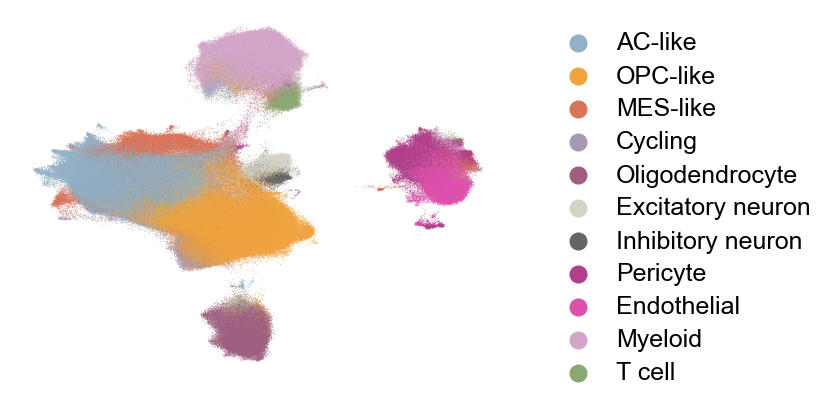

In [21]:
### Figure 5B
# adata.obs['cell_type_final'] = adata.obs['cell_type_final'].astype('category')
adata.obs['cell_type_final'] = pd.Categorical(adata.obs['cell_type_final'],
                                                categories=ordered_celltype,
                                                ordered=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 18})
fig, ax = plt.subplots()
sc.pl.umap(adata, color='cell_type_final', s=1, ax=ax, show=False, palette=cell_type_colors)  # Pass the axis and disable automatic display
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

legend = ax.get_legend()
handles, labels = ax.get_legend_handles_labels()
legend.remove()  # Remove the original legend
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), frameon=False, 
                       # Horizontal spacing between marker and text
                       handletextpad=0.5,  
                       # Vertical spacing between legend entries
                       labelspacing=0.4,
                       # Size of the legend marker
                       markerscale=2.0)  # Create a new legend with scaled markers and increased distance between markers and text
# Add text annotation of total cell number
# ax.text(0.95, 0.05, f'n = {adata.n_obs}', transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
fig.savefig(f'{plot_dir}/Figure5B.png', dpi=1000, bbox_inches='tight')
plt.show()


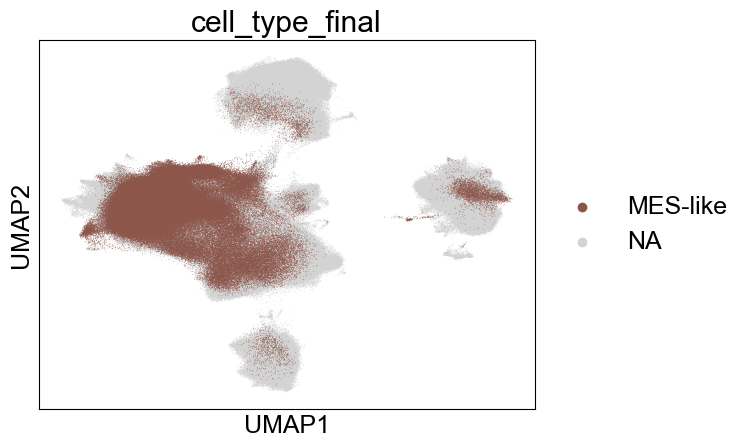

In [25]:
sc.pl.umap(adata, color='cell_type_final', groups=['MES-like'],s=1)  # Pass the axis and disable automatic display

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OPC-like_Mut vs. OPC-like_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.604e-03 U_stat=1.720e+02
MES-like_Mut vs. MES-like_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.490e-03 U_stat=2.900e+01
Myeloid_Mut-Codel vs. Myeloid_Mut: Mann-Whitney-Wilcoxon test two-sided, P_val:1.758e-02 U_stat=7.000e+00
Myeloid_Mut vs. Myeloid_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.501e-02 U_stat=4.700e+01
OPC-like_Mut-Codel vs. OPC-like_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.778e-04 U_stat=1.230e+02
MES-like_Mut-Codel vs. MES-like_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:3.398e-04 U_stat=8.000e+00
Myeloid_Mut-Codel vs. Myeloid_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.336e-04 U_stat=7.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 <

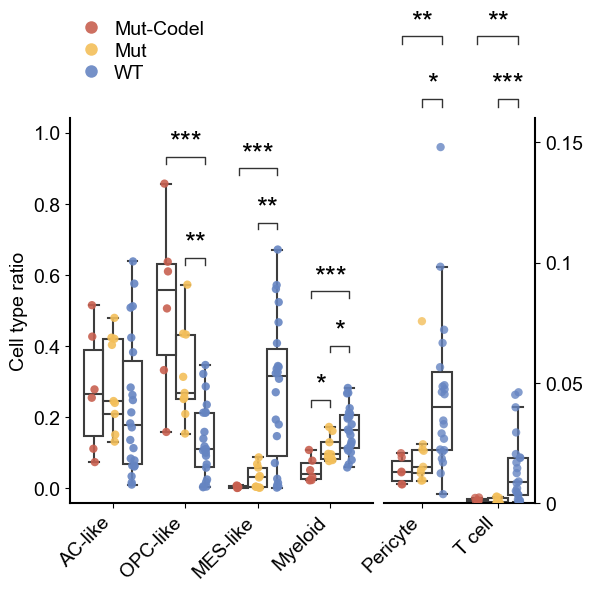

In [45]:
from statannotations.Annotator import Annotator

### Figure 5C
line_width = 1.5
idh_colors = {'Mut-Codel':'#C86050', 'Mut':'#F3BF5A', 'WT':'#6685c2'}
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14})

cell_type_counts = adata.obs.groupby('sample_2')['cell_type_final'].value_counts()
cell_type_ratio = cell_type_counts / cell_type_counts.groupby(level=0).sum()

# Convert the series to a dataframe for easier plotting
cell_type_ratio_df = cell_type_ratio.to_frame().reset_index()
cell_type_ratio_df['idh'] = cell_type_ratio_df['sample_2'].map(adata.obs[['sample_2', 'idh_2']].drop_duplicates().set_index('sample_2')['idh_2'])
cell_type_ratio_df['idh'] = np.where(cell_type_ratio_df['idh'].str.contains('WT'), 'WT', cell_type_ratio_df['idh'])
cell_type_ratio_df['idh'] = pd.Categorical(cell_type_ratio_df['idh'], categories=['Mut-Codel', 'Mut', 'WT'], ordered=True)

selected_df = cell_type_ratio_df[cell_type_ratio_df['cell_type_final'].isin(['AC-like', 'OPC-like', 'MES-like', 'Myeloid', 'Pericyte', 'T cell'])]

selected_df['cell_type_final'] = pd.Categorical(selected_df['cell_type_final'], categories=['AC-like', 'OPC-like', 'MES-like', 'Myeloid', 'Pericyte', 'T cell'], ordered=True)

# Split the data into two groups of cell types
main_celltypes = ['AC-like', 'OPC-like', 'MES-like', 'Myeloid']
other_celltypes = ['Pericyte', 'T cell']

# Create two subplots with reduced spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5), gridspec_kw={'width_ratios': [2, 1], 'wspace': 0.05})

# Plot main cell types
main_df = selected_df[selected_df['cell_type_final'].isin(main_celltypes)]
main_df['cell_type_final'] = main_df['cell_type_final'].cat.remove_unused_categories()
main_df['cell_type_final'] = main_df['cell_type_final'].cat.reorder_categories(['AC-like', 'OPC-like', 'MES-like', 'Myeloid'], ordered=True)
sns.boxplot(x='cell_type_final', y='count', hue='idh', data=main_df, showfliers=False, ax=ax1, legend=False,
            boxprops={'facecolor':'none', 'linewidth': line_width}, 
            whiskerprops={'linewidth': line_width},
            capprops={'linewidth': line_width},
            medianprops={'linewidth': line_width})
sns.stripplot(x='cell_type_final', y='count', hue='idh', data=main_df, dodge=True, palette=idh_colors, size=6, alpha=0.9, ax=ax1)

# Add significance annotations
box_pairs = [(("AC-like", "Mut-Codel"), ("AC-like", "Mut")),
             (("AC-like", "Mut-Codel"), ("AC-like", "WT")),
             (("AC-like", "Mut"), ("AC-like", "WT")),
             (("OPC-like", "Mut-Codel"), ("OPC-like", "Mut")),
             (("OPC-like", "Mut-Codel"), ("OPC-like", "WT")),
             (("OPC-like", "Mut"), ("OPC-like", "WT")),
             (("MES-like", "Mut-Codel"), ("MES-like", "Mut")), 
             (("MES-like", "Mut-Codel"), ("MES-like", "WT")),
             (("MES-like", "Mut"), ("MES-like", "WT")),
             (("Myeloid", "Mut-Codel"), ("Myeloid", "Mut")),
             (("Myeloid", "Mut-Codel"), ("Myeloid", "WT")),
             (("Myeloid", "Mut"), ("Myeloid", "WT"))]

# Add statistical annotations using Mann-Whitney U test
annotator = Annotator(ax1, pairs=box_pairs, data=main_df, x='cell_type_final', y='count', hue='idh')
annotator.configure(test='Mann-Whitney', text_format='star',line_width=1, loc='inside',hide_non_significant=True, fontsize=20)
annotator.apply_and_annotate()


ax1.set_ylabel('Cell type ratio')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='', bbox_to_anchor=(0.5, 1.3), frameon=False,
           handletextpad=0.2,  
                       # Vertical spacing between legend entries
            labelspacing=0.2,
                       # Size of the legend marker
            markerscale=1.5)
sns.despine(ax=ax1)

# Plot other cell types
other_df = selected_df[selected_df['cell_type_final'].isin(other_celltypes)]
other_df['cell_type_final'] = other_df['cell_type_final'].cat.remove_unused_categories()
other_df['cell_type_final'] = other_df['cell_type_final'].cat.reorder_categories(['Pericyte', 'T cell'], ordered=True)

sns.boxplot(x='cell_type_final', y='count', hue='idh', data=other_df, showfliers=False, ax=ax2,legend=False,
            boxprops={'facecolor': 'none', 'linewidth': line_width}, 
            whiskerprops={'linewidth': line_width},
            capprops={'linewidth': line_width},
            medianprops={'linewidth': line_width})
sns.stripplot(x='cell_type_final', y='count', hue='idh', palette=idh_colors, data=other_df, dodge=True, size=6, alpha=0.8, ax=ax2)
# Draw lines between the boxes for Pericyte and T cell
line_data = other_df.groupby(['cell_type_final', 'idh'])['count'].median().unstack()

ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0, 0.16)
ax2.set_yticks([0, 0.05, 0.1, 0.15])
ax2.set_yticklabels(['0', '0.05', '0.1', '0.15'])
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.yaxis.set_label_position('right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend().remove()  # Remove legend from second subplot
sns.despine(ax=ax2, top=True, right=False, left=True)

# Add significance annotations for other cell types
box_pairs_other = [(("Pericyte", "Mut-Codel"), ("Pericyte", "Mut")), 
                   (("Pericyte", "Mut-Codel"), ("Pericyte", "WT")),
                   (("Pericyte", "Mut"), ("Pericyte", "WT")),
                   (("T cell", "Mut-Codel"), ("T cell", "Mut")), 
                   (("T cell", "Mut-Codel"), ("T cell", "WT")),
                   (("T cell", "Mut"), ("T cell", "WT"))]
annotator = Annotator(ax2, pairs=box_pairs_other, data=other_df, x='cell_type_final', y='count', hue='idh', legend=False)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2, line_width = 1, hide_non_significant=True,fontsize=20)
annotator.apply_and_annotate()

# Increase the spine linewidth
for spine in ax1.spines.values():
    spine.set_linewidth(line_width)
for spine in ax2.spines.values():
    spine.set_linewidth(line_width)

plt.tight_layout()
fig.savefig(f'{plot_dir}/Figure5C.png', dpi=300, bbox_inches='tight')


AC-like:
  Mut-Codel vs Mut: p-value = 1.0000
  Mut-Codel vs WT: p-value = 0.4269
  Mut vs WT: p-value = 0.2488
OPC-like:
  Mut-Codel vs Mut: p-value = 0.0879
  Mut-Codel vs WT: p-value = 0.0005
  Mut vs WT: p-value = 0.0016
MES-like:
  Mut-Codel vs Mut: p-value = 0.1447
  Mut-Codel vs WT: p-value = 0.0003
  Mut vs WT: p-value = 0.0025
Myeloid:
  Mut-Codel vs Mut: p-value = 0.0176
  Mut-Codel vs WT: p-value = 0.0002
  Mut vs WT: p-value = 0.0250
Pericyte:
  Mut-Codel vs Mut: p-value = 0.2238
  Mut-Codel vs WT: p-value = 0.0021
  Mut vs WT: p-value = 0.0199
T cell:
  Mut-Codel vs Mut: p-value = 0.2721
  Mut-Codel vs WT: p-value = 0.0065
  Mut vs WT: p-value = 0.0003


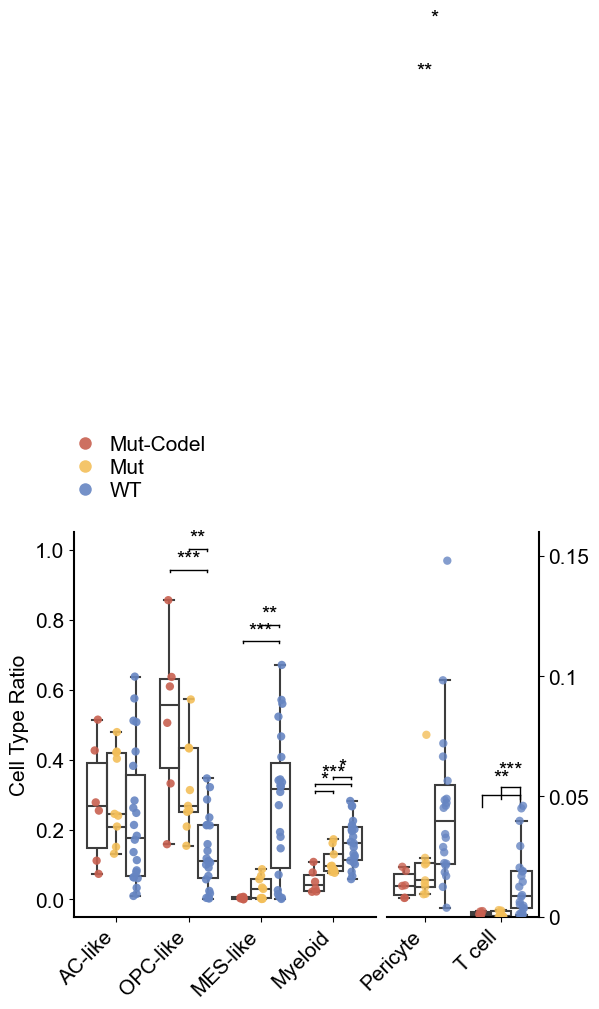

AC-like:
  Mut-Codel vs Mut: p-value = 1.0000
  Mut-Codel vs WT: p-value = 0.4269
  Mut vs WT: p-value = 0.2488
OPC-like:
  Mut-Codel vs Mut: p-value = 0.0879
  Mut-Codel vs WT: p-value = 0.0005
  Mut vs WT: p-value = 0.0016
MES-like:
  Mut-Codel vs Mut: p-value = 0.1447
  Mut-Codel vs WT: p-value = 0.0003
  Mut vs WT: p-value = 0.0025
Myeloid:
  Mut-Codel vs Mut: p-value = 0.0176
  Mut-Codel vs WT: p-value = 0.0002
  Mut vs WT: p-value = 0.0250
Pericyte:
  Mut-Codel vs Mut: p-value = 0.2238
  Mut-Codel vs WT: p-value = 0.0021
  Mut vs WT: p-value = 0.0199
T cell:
  Mut-Codel vs Mut: p-value = 0.2721
  Mut-Codel vs WT: p-value = 0.0065
  Mut vs WT: p-value = 0.0003


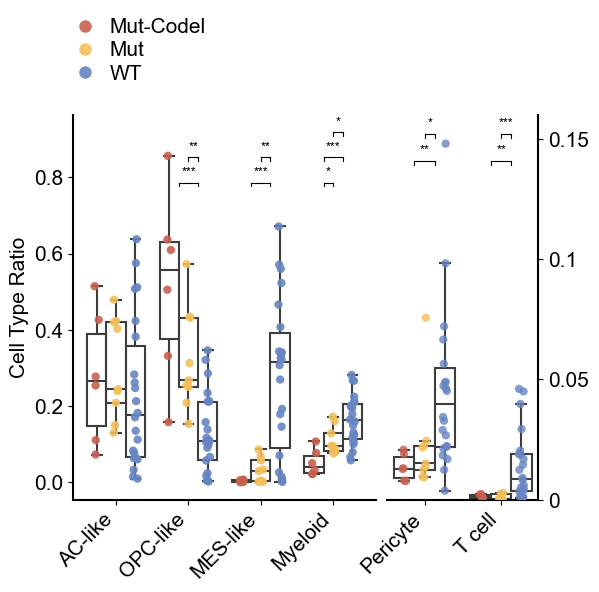

In [13]:
### Figure 5C
line_width = 1.5
idh_colors = {'Mut-Codel':'#C86050', 'Mut':'#F3BF5A', 'WT':'#6685c2'}
plt.rcParams.update({'font.family': 'Arial', 'font.size': 15})

cell_type_counts = adata.obs.groupby('sample_2')['cell_type_final'].value_counts()
cell_type_ratio = cell_type_counts / cell_type_counts.groupby(level=0).sum()

# Convert the series to a dataframe for easier plotting
cell_type_ratio_df = cell_type_ratio.to_frame().reset_index()
cell_type_ratio_df['idh'] = cell_type_ratio_df['sample_2'].map(adata.obs[['sample_2', 'idh_2']].drop_duplicates().set_index('sample_2')['idh_2'])
cell_type_ratio_df['idh'] = np.where(cell_type_ratio_df['idh'].str.contains('WT'), 'WT', cell_type_ratio_df['idh'])
cell_type_ratio_df['idh'] = pd.Categorical(cell_type_ratio_df['idh'], categories=['Mut-Codel', 'Mut', 'WT'], ordered=True)

selected_df = cell_type_ratio_df[cell_type_ratio_df['cell_type_final'].isin(['AC-like', 'OPC-like', 'MES-like', 'Myeloid', 'Pericyte', 'T cell'])]

selected_df['cell_type_final'] = pd.Categorical(selected_df['cell_type_final'], categories=['AC-like', 'OPC-like', 'MES-like', 'Myeloid', 'Pericyte', 'T cell'], ordered=True)

# Split the data into two groups of cell types
main_celltypes = ['AC-like', 'OPC-like', 'MES-like', 'Myeloid']
other_celltypes = ['Pericyte', 'T cell']

# Create two subplots with reduced spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5), gridspec_kw={'width_ratios': [2, 1], 'wspace': 0.05})

# Plot main cell types
main_df = selected_df[selected_df['cell_type_final'].isin(main_celltypes)]
main_df['cell_type_final'] = main_df['cell_type_final'].cat.remove_unused_categories()
main_df['cell_type_final'] = main_df['cell_type_final'].cat.reorder_categories(['AC-like', 'OPC-like', 'MES-like', 'Myeloid'], ordered=True)
sns.boxplot(x='cell_type_final', y='count', hue='idh', data=main_df, showfliers=False, ax=ax1, legend=False,
            boxprops={'facecolor':'none', 'linewidth': line_width}, 
            whiskerprops={'linewidth': line_width},
            capprops={'linewidth': line_width},
            medianprops={'linewidth': line_width})
sns.stripplot(x='cell_type_final', y='count', hue='idh', data=main_df, legend=True, dodge=True, palette=idh_colors, size=6, alpha=0.9, ax=ax1)

ax1.set_ylabel('Cell Type Ratio')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='', bbox_to_anchor=(0.5, 1.3), frameon=False,
           handletextpad=0.2,  
                       # Vertical spacing between legend entries
            labelspacing=0.2,
                       # Size of the legend marker
            markerscale=1.5)
sns.despine(ax=ax1)

# Plot other cell types
other_df = selected_df[selected_df['cell_type_final'].isin(other_celltypes)]
other_df['cell_type_final'] = other_df['cell_type_final'].cat.remove_unused_categories()
other_df['cell_type_final'] = other_df['cell_type_final'].cat.reorder_categories(['Pericyte', 'T cell'], ordered=True)

sns.boxplot(x='cell_type_final', y='count', hue='idh', data=other_df, showfliers=False, ax=ax2, legend=False,
            boxprops={'facecolor': 'none', 'linewidth': line_width}, 
            whiskerprops={'linewidth': line_width},
            capprops={'linewidth': line_width},
            medianprops={'linewidth': line_width})
sns.stripplot(x='cell_type_final', y='count', hue='idh', palette=idh_colors, data=other_df, color='black', dodge=True, size=6, alpha=0.8, ax=ax2)
# Draw lines between the boxes for Pericyte and T cell
line_data = other_df.groupby(['cell_type_final', 'idh'])['count'].median().unstack()

ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0, 0.16)
ax2.set_yticks([0, 0.05, 0.1, 0.15])
ax2.set_yticklabels(['0', '0.05', '0.1', '0.15'])
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks_position('both')
ax2.yaxis.set_label_position('right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend().remove()  # Remove legend from second subplot
sns.despine(ax=ax2, top=True, right=False, left=True)

# Increase the spine linewidth
for spine in ax1.spines.values():
    spine.set_linewidth(line_width)
for spine in ax2.spines.values():
    spine.set_linewidth(line_width)

## statistic test
import scipy.stats as stats

# Perform statistical tests for all cell types
cell_types_to_test = main_celltypes + other_celltypes
p_values = {}
for cell_type in cell_types_to_test:
    group_data = selected_df[selected_df['cell_type_final'] == cell_type]
    mut_codel = group_data[group_data['idh'] == 'Mut-Codel']['count']
    mut = group_data[group_data['idh'] == 'Mut']['count']
    wt = group_data[group_data['idh'] == 'WT']['count']
    
    # Perform Mann–Whitney U test
    mut_codel_vs_mut = stats.mannwhitneyu(mut_codel, mut, alternative='two-sided')
    mut_codel_vs_wt = stats.mannwhitneyu(mut_codel, wt, alternative='two-sided')
    mut_vs_wt = stats.mannwhitneyu(mut, wt, alternative='two-sided')
    
    p_values[cell_type] = {
        'Mut-Codel vs Mut': mut_codel_vs_mut.pvalue,
        'Mut-Codel vs WT': mut_codel_vs_wt.pvalue,
        'Mut vs WT': mut_vs_wt.pvalue
    }

# Print p-values
for cell_type, p_value_dict in p_values.items():
    print(f'{cell_type}:')
    for comparison, p_value in p_value_dict.items():
        print(f'  {comparison}: p-value = {p_value:.4f}')

# Add significance indicators - Revised for better positioning
def add_significance_bars(cell_type, p_values_dict):
    """Add significance bars to the plot if p-value < 0.05 with improved positioning"""
    
    # Determine which axis to use
    if cell_type in main_celltypes:
        cell_idx = main_celltypes.index(cell_type)
        target_ax = ax1
        y_range = target_ax.get_ylim()[1] - target_ax.get_ylim()[0]
        
        # Get box coordinates
        x_center = cell_idx
        box_width = 0.8  # Width of the boxplot group
        
        # Define positions for each IDH category (matches the dodging in stripplot)
        positions = {
            'Mut-Codel': x_center - box_width/6,
            'Mut': x_center,
            'WT': x_center + box_width/6
        }
    else:
        cell_idx = other_celltypes.index(cell_type)
        target_ax = ax2
        y_range = target_ax.get_ylim()[1] - target_ax.get_ylim()[0]
        
        # Get box coordinates
        x_center = cell_idx
        box_width = 0.8
        
        # Define positions for each IDH category
        positions = {
            'Mut-Codel': x_center - box_width/6,
            'Mut': x_center,
            'WT': x_center + box_width/6
        }
    
    # Define the comparisons to test
    comparisons = [
        ('Mut-Codel', 'Mut', 'Mut-Codel vs Mut'),
        ('Mut-Codel', 'WT', 'Mut-Codel vs WT'),
        ('Mut', 'WT', 'Mut vs WT')
    ]
    
    # Track the number of significant comparisons for spacing
    sig_count = 0
    
    for group1, group2, comp_name in comparisons:
        p_value = p_values_dict[comp_name]
        
        if p_value < 0.05:
            # Set significance level annotations
            if p_value < 0.001:
                sig_symbol = '***'
            elif p_value < 0.01:
                sig_symbol = '**'
            elif p_value < 0.05:
                sig_symbol = '*'
            
            # Calculate positions for the significance bar
            x1 = positions[group1]
            x2 = positions[group2]
            
            # Adjust height based on the plot type and significance count
            if cell_type in main_celltypes:
                # For main plot with higher range
                y_step = y_range * 0.07
                base_height = target_ax.get_ylim()[1] - (y_range * 0.12)
                bar_height = base_height + (sig_count * y_step)
            else:
                # For secondary plot with lower range
                y_step = y_range * 0.07
                base_height = target_ax.get_ylim()[1] - (y_range * 0.12)
                bar_height = base_height + (sig_count * y_step)
            
            # Length of bar endpoints
            tick_length = y_range * 0.01
            
            # Draw the bar with thinner lines similar to the reference
            target_ax.plot([x1, x2], [bar_height, bar_height], 'k-', linewidth=0.8)
            
            # Add small vertical lines at the ends
            target_ax.plot([x1, x1], [bar_height - tick_length, bar_height], 'k-', linewidth=0.8)
            target_ax.plot([x2, x2], [bar_height - tick_length, bar_height], 'k-', linewidth=0.8)
            
            # Add significance annotation with adjusted font size
            target_ax.text((x1 + x2) / 2, bar_height + (y_range * 0.01), sig_symbol, 
                      ha='center', va='bottom', fontsize=9)
            
            sig_count += 1

# Apply corrected significance bars for each cell type
for cell_type in cell_types_to_test:
    add_significance_bars(cell_type, p_values[cell_type])

plt.tight_layout()
fig.savefig(f'{plot_dir}/Figure5C.png', dpi=300, bbox_inches='tight')